In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


## Generate Data

In [36]:
X_train = np.linspace(-1, 1, 20)

In [37]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, -0.02445, -0.00135, -0.2006, 0.07475,
                    -0.1422, -0.06515, 0.15265, 0.3521, 0.28415,
                    0.5524, 0.23115, 0.20835, 0.4211, 0.60485
                    ])

In [38]:
X_test = np.linspace(-1, 1, 20)

In [39]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435
                   ])

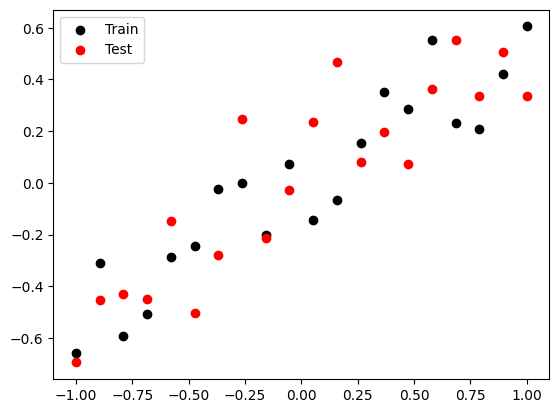

In [40]:
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.legend()
plt.show()

## Regression Model

In [41]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)


In [42]:
# evaluate the model

_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f'Train: {train_mse}, Test: {test_mse}')

Train: 0.0018641051137819886, Test: 0.0499575100839138


In [43]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


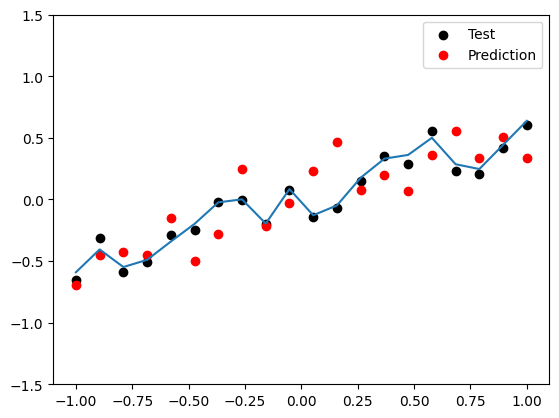

In [44]:
plt.figure()
plt.scatter(X_train, y_train, c='black', label='Test')
plt.scatter(X_test, y_test, c='red', label='Prediction')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

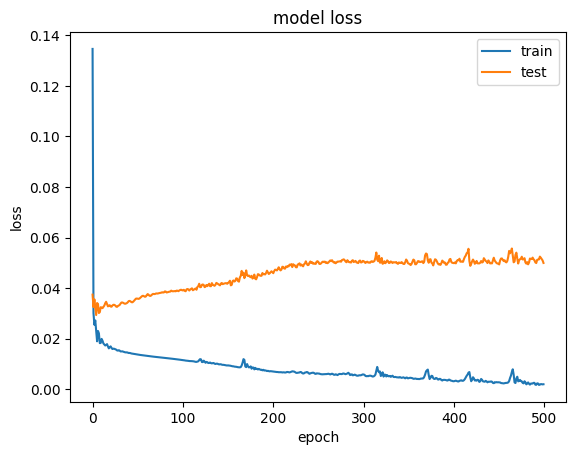

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Dropout Model

In [46]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

In [47]:
# evaluate the model

_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f'Train: {train_mse}, Test: {test_mse}')

Train: 0.01104732695966959, Test: 0.04713579639792442


In [48]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


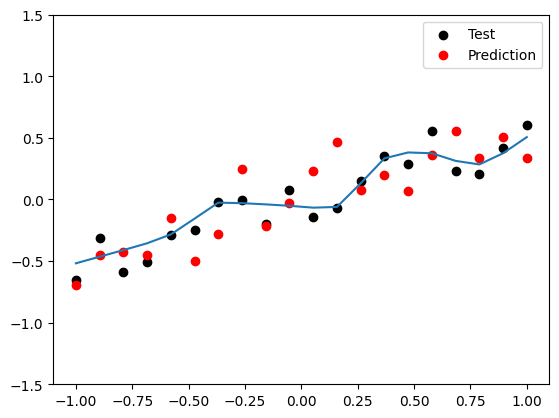

In [49]:
plt.figure()
plt.scatter(X_train, y_train, c='black', label='Test')
plt.scatter(X_test, y_test, c='red', label='Prediction')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

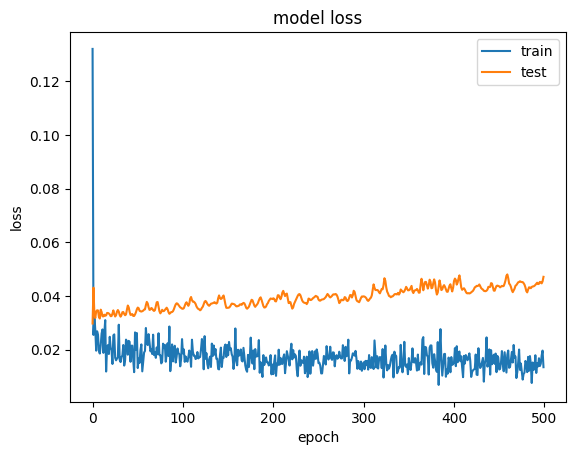

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()